In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
apr_df = pd.read_csv("Downloads/uber-apr14.csv")
may_df = pd.read_csv("Downloads/uber-may14.csv")
jun_df = pd.read_csv("Downloads/uber-jun14.csv")
jul_df = pd.read_csv("Downloads/uber-jul14.csv")
aug_df = pd.read_csv("Downloads/uber-aug14.csv")
sep_df = pd.read_csv("Downloads/uber-sep14.csv")

In [15]:
print(apr_df.shape)
apr_df.head()

(564516, 4)


,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [16]:
print(may_df.shape)
may_df.head()

(652435, 4)


,Date/Time,Lat,Lon,Base
0,5/1/2014 0:02:00,40.7521,-73.9914,B02512
1,5/1/2014 0:06:00,40.6965,-73.9715,B02512
2,5/1/2014 0:15:00,40.7464,-73.9838,B02512
3,5/1/2014 0:17:00,40.7463,-74.0011,B02512
4,5/1/2014 0:17:00,40.7594,-73.9734,B02512


In [17]:
print(jun_df.shape)
jun_df.head()

(663844, 4)


,Date/Time,Lat,Lon,Base
0,6/1/2014 0:00:00,40.7293,-73.9920,B02512
1,6/1/2014 0:01:00,40.7131,-74.0097,B02512
2,6/1/2014 0:04:00,40.3461,-74.6610,B02512
3,6/1/2014 0:04:00,40.7555,-73.9833,B02512
4,6/1/2014 0:07:00,40.6880,-74.1831,B02512


In [18]:
print(jul_df.shape)
jul_df.head()

(796121, 4)


,Date/Time,Lat,Lon,Base
0,7/1/2014 0:03:00,40.7586,-73.9706,B02512
1,7/1/2014 0:05:00,40.7605,-73.9994,B02512
2,7/1/2014 0:06:00,40.7320,-73.9999,B02512
3,7/1/2014 0:09:00,40.7635,-73.9793,B02512
4,7/1/2014 0:20:00,40.7204,-74.0047,B02512


In [21]:
print(aug_df.shape)
aug_df.head()

(829275, 4)


,Date/Time,Lat,Lon,Base
0,8/1/2014 0:03:00,40.7366,-73.9906,B02512
1,8/1/2014 0:09:00,40.7260,-73.9918,B02512
2,8/1/2014 0:12:00,40.7209,-74.0507,B02512
3,8/1/2014 0:12:00,40.7387,-73.9856,B02512
4,8/1/2014 0:12:00,40.7323,-74.0077,B02512


In [19]:
print(sep_df.shape)
sep_df.head()

(1028136, 4)


,Date/Time,Lat,Lon,Base
0,9/1/2014 0:01:00,40.2201,-74.0021,B02512
1,9/1/2014 0:01:00,40.7500,-74.0027,B02512
2,9/1/2014 0:03:00,40.7559,-73.9864,B02512
3,9/1/2014 0:06:00,40.7450,-73.9889,B02512
4,9/1/2014 0:11:00,40.8145,-73.9444,B02512


### Concatinating all the files into a single file

In [22]:
data = pd.concat([apr_df,may_df,jun_df,jul_df,aug_df,sep_df],axis = 0, ignore_index = True)

In [24]:
data.shape

(4534327, 4)

In [25]:
data.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4534327 entries, 0 to 4534326
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Date/Time  object 
 1   Lat        float64
 2   Lon        float64
 3   Base       object 
dtypes: float64(2), object(2)
memory usage: 138.4+ MB


In [27]:
data.isnull().sum()

Date/Time    0
Lat          0
Lon          0
Base         0
dtype: int64

In [29]:
data.rename({"Date/Time" : "Date"}, axis = 1, inplace = True)
data["Date"] = pd.to_datetime(data["Date"])

In [30]:
data.head()

,Date,Lat,Lon,Base
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512


In [31]:
data["Month"] = data["Date"].dt.month_name().str[:3]
data["Day"] = data["Date"].dt.day_name().str[:3]
data["Hour"] = data["Date"].dt.hour
data["Nday"] = data["Date"].dt.day
data["Date"] = data["Date"].dt.date
data.head()

,Date,Lat,Lon,Base,Month,Day,Hour,Nday
0,2014-04-01,40.7690,-73.9549,B02512,Apr,Tue,0,1
1,2014-04-01,40.7267,-74.0345,B02512,Apr,Tue,0,1
2,2014-04-01,40.7316,-73.9873,B02512,Apr,Tue,0,1
3,2014-04-01,40.7588,-73.9776,B02512,Apr,Tue,0,1
4,2014-04-01,40.7594,-73.9722,B02512,Apr,Tue,0,1


## Visualization
### No of pick-up during the different hours in a day

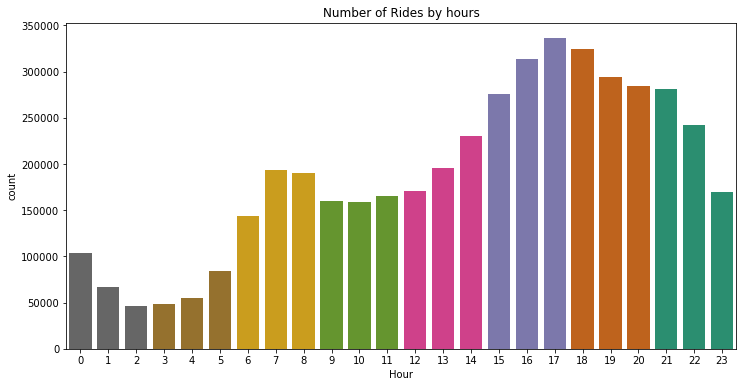

In [38]:
plt.figure(figsize = (12,6))
sns.countplot(x = "Hour", data = data , palette = "Dark2_r")
plt.title("Number of Rides by hours")
plt.show()

#### It's clear that rides are very less from 12:00 am till 7:00 am and increases from 7:00 AM
#### number of rides are at peak from 4:00 pm to 9:00 pm 

### Number of rides in different days in a week

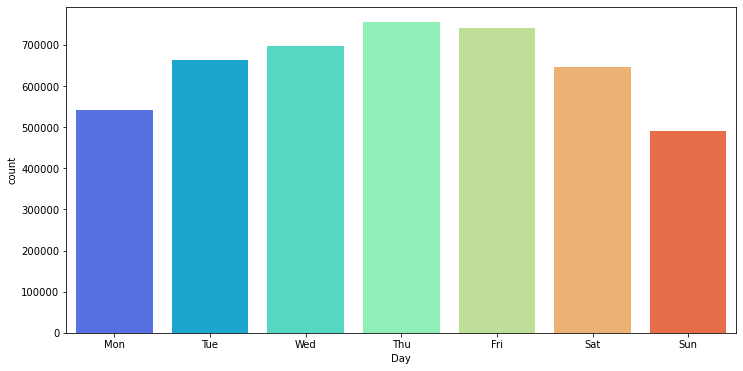

In [42]:
plt.figure(figsize = (12,6))
sns.countplot(x = "Day", data = data, order = ["Mon","Tue", "Wed","Thu","Fri","Sat","Sun"] , palette = "rainbow")
plt.show()

#### 1. We can conclude that rides increases as the week goes on and decreses gradually as the weekend starts
#### 2. Cab usage is highest on Wednesday,Thursday and Friday, Thursday being the highest of them all 

### Monthy wise Trend

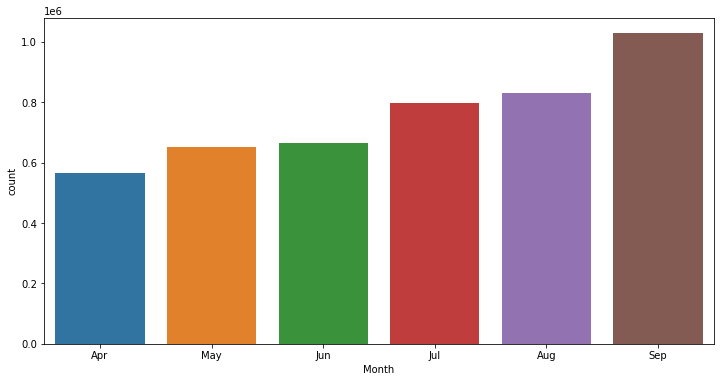

In [43]:
plt.figure(figsize= (12,6))
sns.countplot(x = "Month", data = data)
plt.show()

#### In the year 2014 bookings kept on increasing as the year progresses
#### It was less during April, but as ppl getting adjusted to cabs, more people started using cabs as the year goes on

### Months and Day Visualization

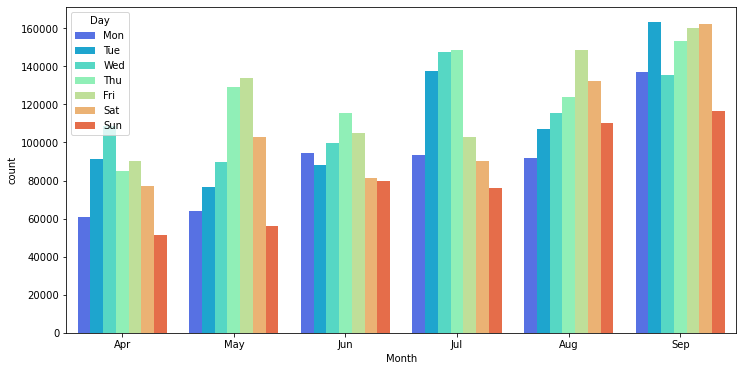

In [45]:
plt.figure(figsize = (12,6))
sns.countplot(x = "Month", data = data, hue = "Day", palette = "rainbow", hue_order=["Mon","Tue","Wed","Thu","Fri","Sat","Sun"])
plt.show()

### Base bookings

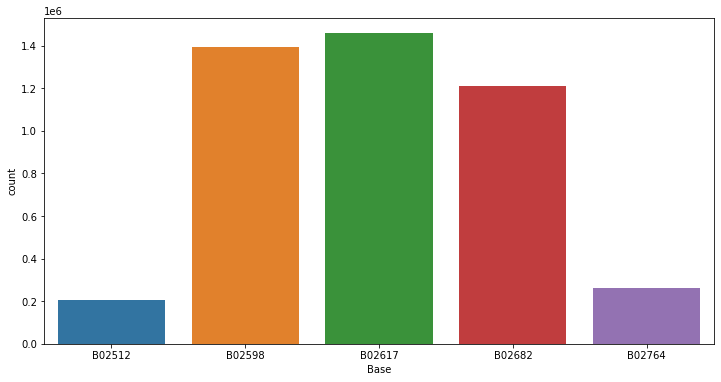

In [47]:
plt.figure(figsize = (12,6))
sns.countplot(x = "Base", data = data)
plt.show()

# Overall Observation

    1. Evening and Late in the evening are the hot business Hours
    2. More number bookings happed during Mid off the week Sunday, being the least
    3. Cabs business increased as the year goes on, Since cunstomer need time to get adjusted to it
    4. B02617 is the base where many people dependable on cab services
    5. Sunday is the best time for drivers to take a day off since not much business happens on that day
    6. To make more profit cab drivers should be more active during post 3:00 pm and till 9:00 pm 